**Machine learning models to predict e-commerce visitors’ purchasing intention**




Import Libraries 

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score


from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV


# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

**Load Data**

In [ ]:
data =  pd.read_csv('Coursework_1_data.csv')

**Data Description**

In [ ]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

# **Data Exploration**

Correlation map

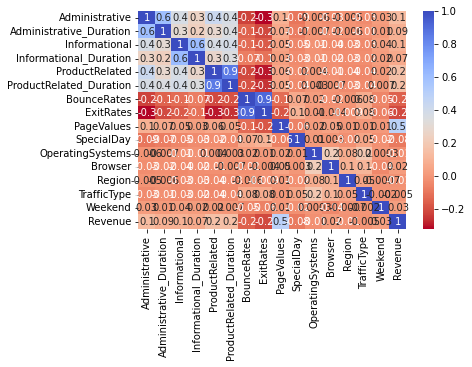

In [ ]:
sns.heatmap(data.corr(),annot=True,fmt='.1g',cmap='coolwarm_r')

Insights:

There is a high correlation with page values and revenue

Bounces rates got negative influence on revenue

Pages which has high bounce rates tends to have high exit rates as well

The website earns a lot of revenue from product related pages


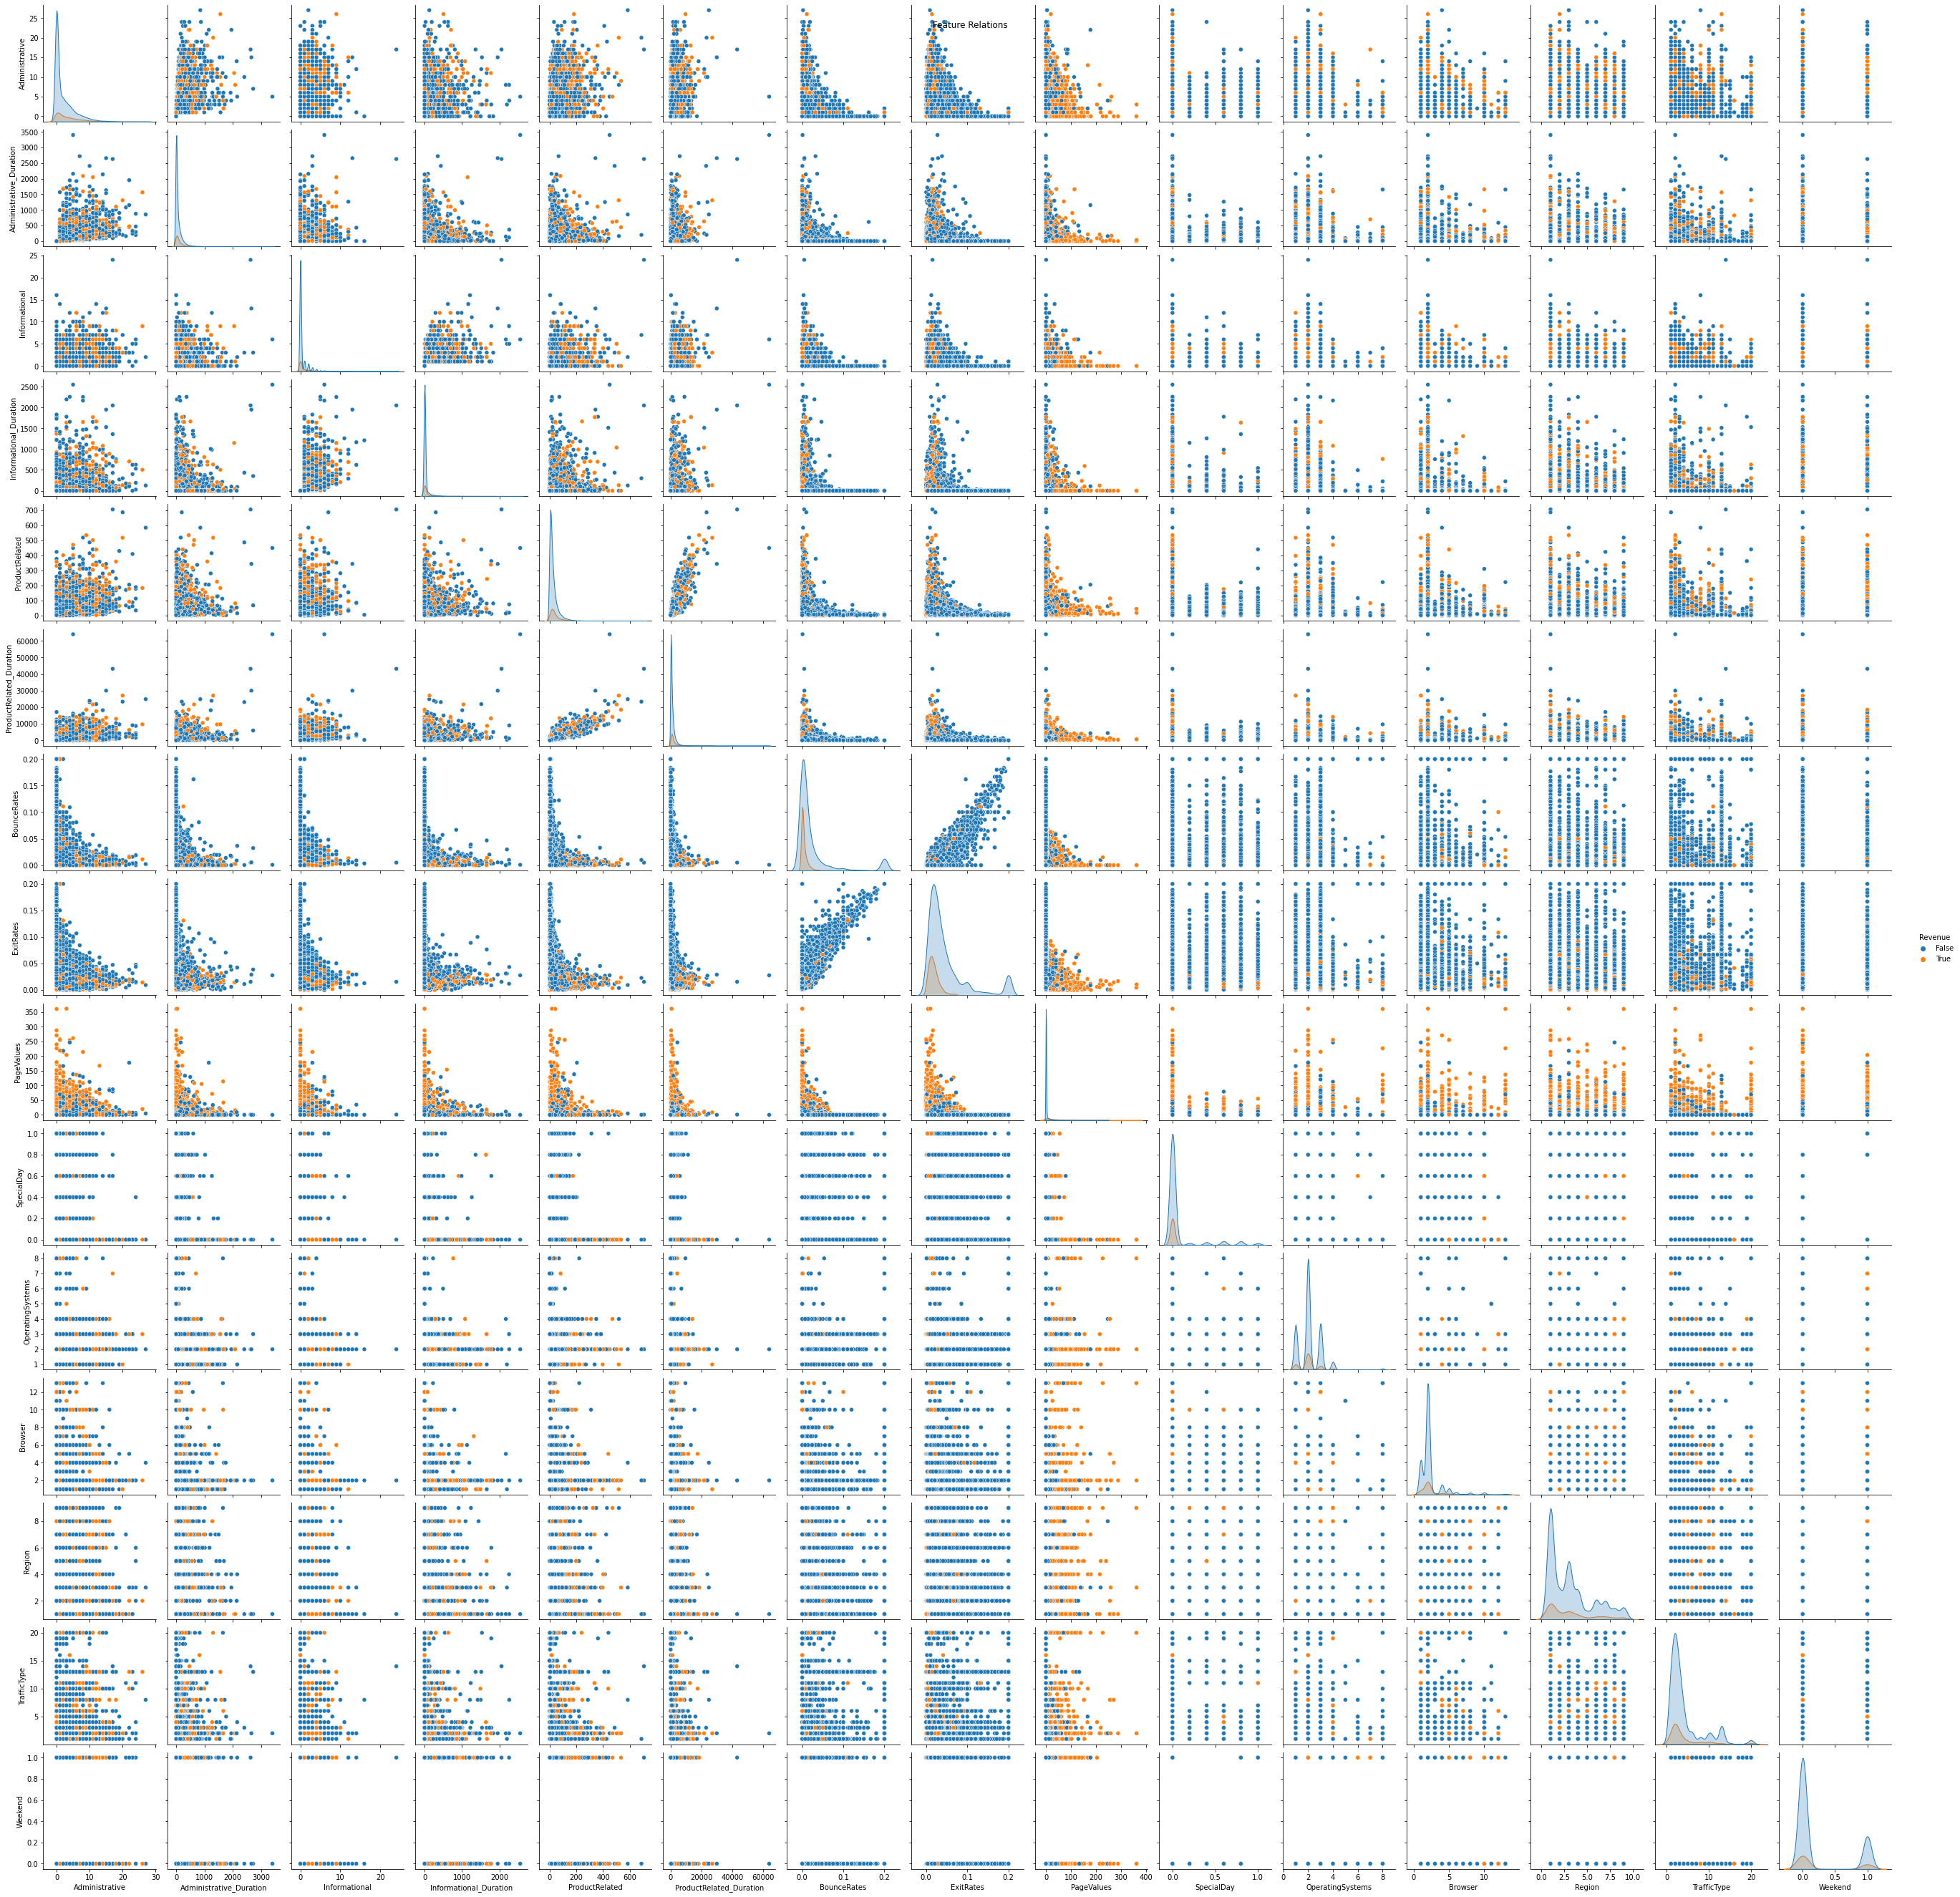

In [ ]:
d1 = sns.pairplot(data, hue='Revenue')
d1.fig.suptitle('Feature Relations')
plt.show()

**Web Pages Analysis**

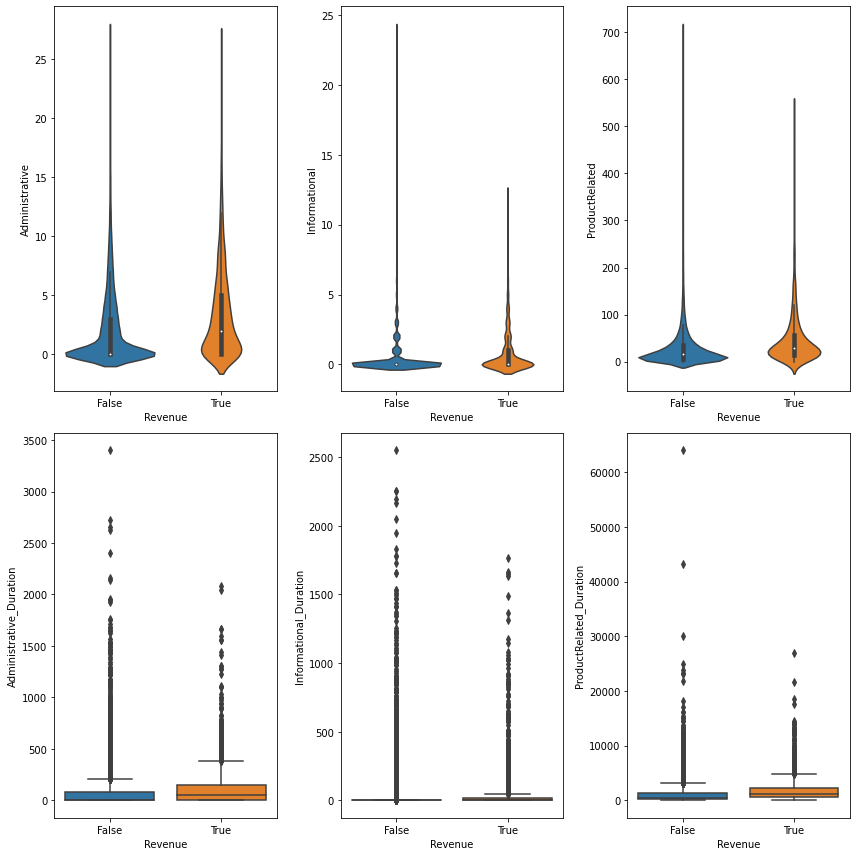

In [ ]:
fig = plt.figure(figsize=(12, 12))

ax1 = fig.add_subplot(2, 3, 1)
ax2 = fig.add_subplot(2, 3, 2)
ax3 = fig.add_subplot(2, 3, 3)
ax4 = fig.add_subplot(2, 3, 4)
ax5 = fig.add_subplot(2, 3, 5)
ax6 = fig.add_subplot(2, 3, 6)

sns.violinplot(data=data, x = 'Revenue', y = 'Administrative', ax=ax1)
sns.violinplot(data=data, x = 'Revenue', y = 'Informational', ax=ax2)
sns.violinplot(data=data, x = 'Revenue', y = 'ProductRelated', ax=ax3)
sns.boxplot(data=data, x = 'Revenue', y = 'Administrative_Duration', ax=ax4)
sns.boxplot(data=data, x = 'Revenue', y = 'Informational_Duration', ax=ax5)
sns.boxplot(data=data, x = 'Revenue', y = 'ProductRelated_Duration', ax=ax6)

plt.tight_layout()
plt.show()

Duration of pages vs Revenue

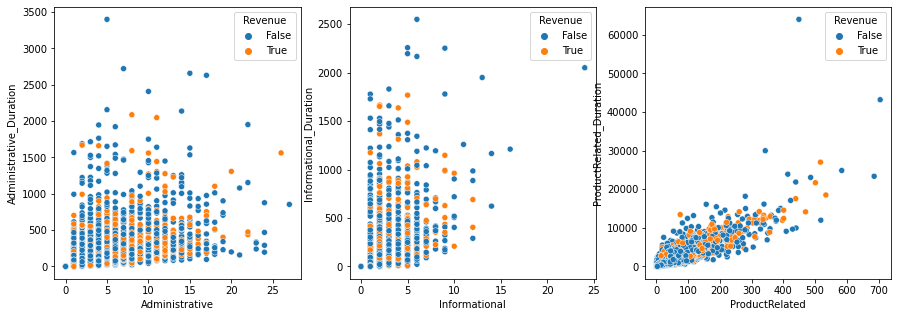

In [ ]:
plt.figure(figsize = (15, 5))
#plt.style.use('seaborn-white')
plt.subplot(131)
sns.scatterplot(x="Administrative", y="Administrative_Duration",hue="Revenue", data=data)
plt.subplot(132)
sns.scatterplot(x="Informational", y="Informational_Duration",hue="Revenue", data=data)
plt.subplot(133)
sns.scatterplot(x="ProductRelated", y="ProductRelated_Duration",hue="Revenue", data=data)

Insights:

High duration users are found for the initial types of pages (0-15: Administrative;0-10:Informational;0-300:Product Related)

Revenue hasn't been generated for the latter types

There is a linear relationship between product_related and Product duration (multicollinearity)

**Visitor Analysis**

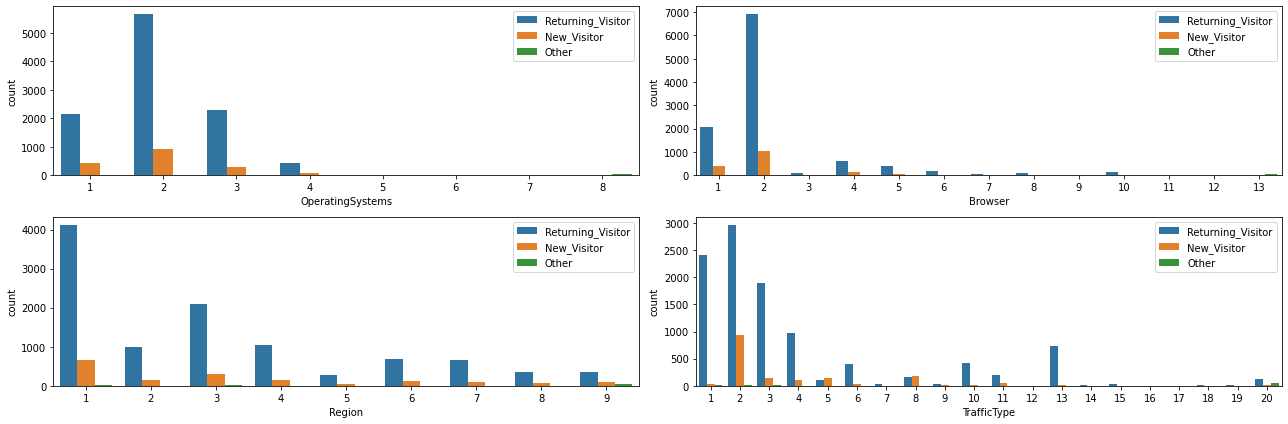

In [ ]:
fig = plt.figure(figsize=(18, 6))

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

sns.countplot(data=data, x='OperatingSystems', hue='VisitorType', ax=ax1)
sns.countplot(data=data, x='Browser', hue='VisitorType', ax=ax2)
sns.countplot(data=data, x='Region', hue='VisitorType', ax=ax3)
sns.countplot(data=data, x='TrafficType', hue='VisitorType', ax=ax4)

ax1.legend(loc='upper right')
ax2.legend(loc='upper right')
ax3.legend(loc='upper right')
ax4.legend(loc='upper right')
plt.tight_layout()
plt.show()

**Visit Data Analysis**


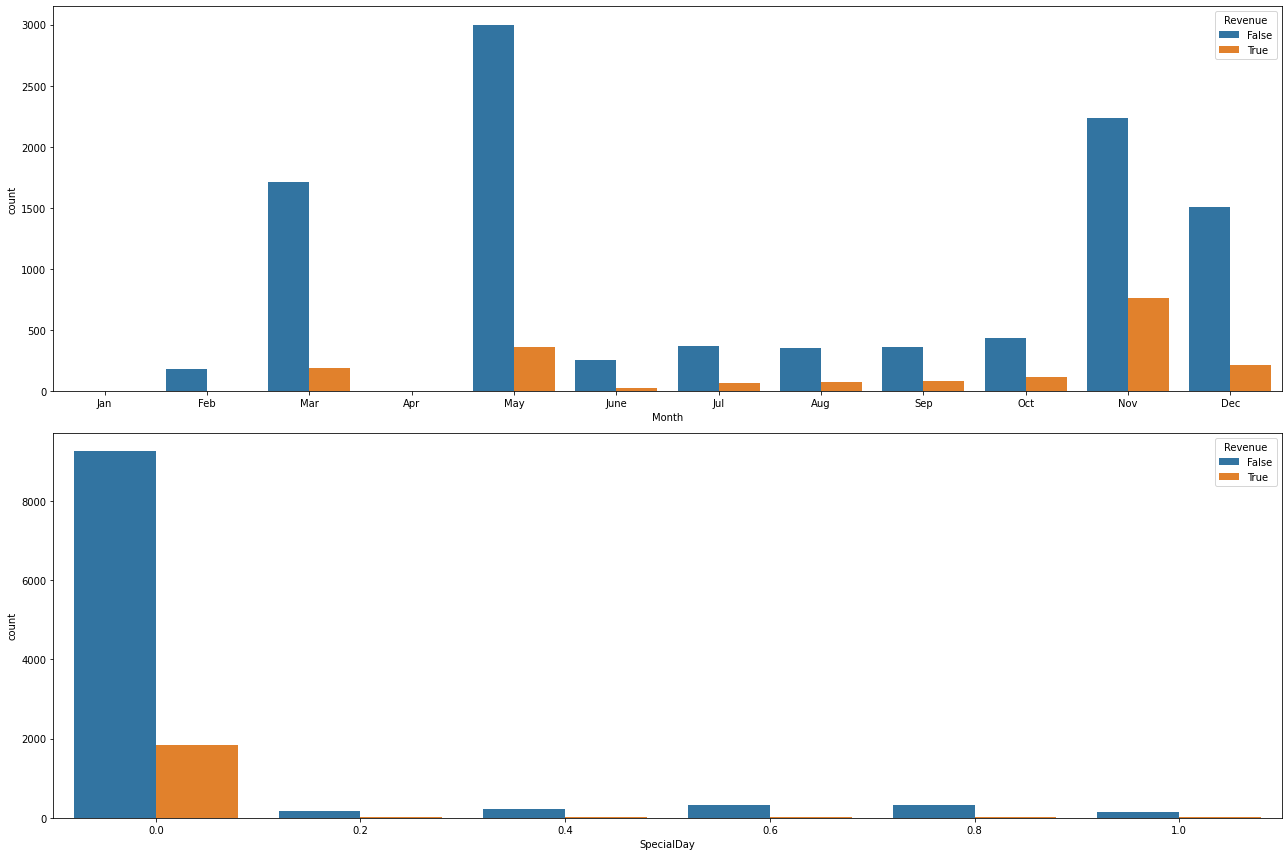

In [ ]:
fig = plt.figure(figsize=(18, 12))

ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

orderlist = ['Jan','Feb','Mar','Apr','May','June','Jul','Aug','Sep','Oct','Nov','Dec']
sns.countplot(data=data, x='Month', hue='Revenue', ax=ax1, order=orderlist)
sns.countplot(data=data, x='SpecialDay', hue='Revenue', ax=ax2)

plt.tight_layout()
plt.show()

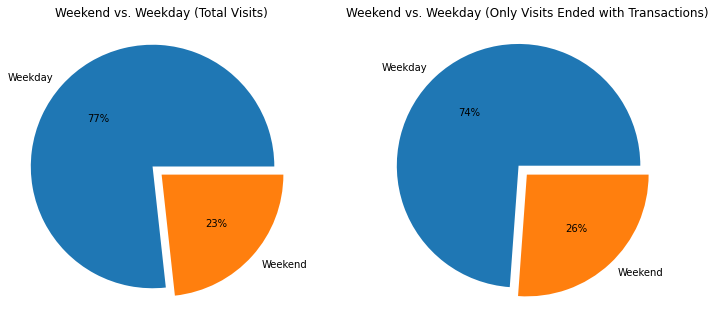

In [ ]:
fig, ax = plt.subplots(1, 2,figsize=(12, 6), subplot_kw=dict(aspect="equal"))
ax[0].pie(data['Weekend'].value_counts(),explode=(0.1,0),labels=['Weekday','Weekend'], autopct='%1.0f%%')
ax[0].set_title('Weekend vs. Weekday (Total Visits)')
ax[1].pie(data[data['Revenue'] == 1]['Weekend'].value_counts(),explode=(0.1,0),labels=['Weekday','Weekend'], autopct='%1.0f%%')
ax[1].set_title('Weekend vs. Weekday (Only Visits Ended with Transactions)')
#fig.suptitle('Weekend Visits')
plt.show()

**Bounce & Exit Rates Vs Revenue**

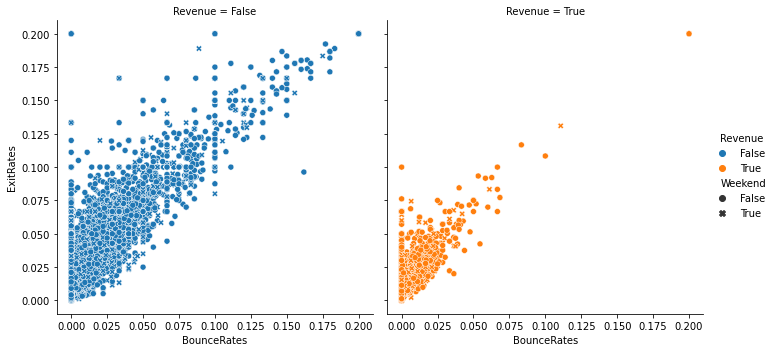

In [ ]:
sns.relplot(x="BounceRates", y="ExitRates",col="Revenue",hue="Revenue",style="Weekend", data=data)

**Insights**:



High Bounce and Exit Rates lead to no Revenue

Revenue data is heavily imbalanced

More Bounce and Exit rates when it is not a weekend

Handling Outliers
Check Outliers using Boxplot in Numerical feature 

Text(0.5, 1.0, 'PageValues')

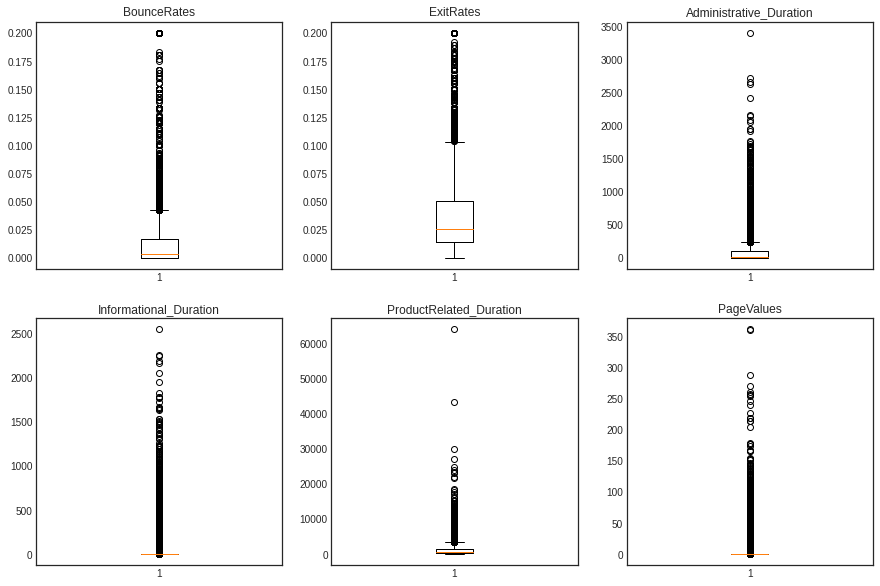

In [ ]:
plt.figure(figsize = (15, 10))
plt.style.use('seaborn-white')
ax=plt.subplot(231)
plt.boxplot(data['BounceRates'])
ax.set_title('BounceRates')
ax=plt.subplot(232)
plt.boxplot(data['ExitRates'])
ax.set_title('ExitRates')
ax=plt.subplot(233)
plt.boxplot(data['Administrative_Duration'])
ax.set_title('Administrative_Duration')
ax=plt.subplot(234)
plt.boxplot(data['Informational_Duration'])
ax.set_title('Informational_Duration')
ax=plt.subplot(235)
plt.boxplot(data['ProductRelated_Duration'])
ax.set_title('ProductRelated_Duration')
ax=plt.subplot(236)
plt.boxplot(data['PageValues'])
ax.set_title('PageValues')

# **Data Preprocessing**

Checking for Missing Values 

In [ ]:
data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

**Insights**:
No Missing values found in this dataset

**Checking Data types of the features**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [ ]:
data_x = data[['Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration','BounceRates','ExitRates','PageValues','SpecialDay','Month','OperatingSystems','Browser','Region','TrafficType','VisitorType','Weekend']]
data_y = data[['Revenue']]

**Split data into training set and test set**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.3, random_state=42)

**Preprocessing Pipeline & ColumnTransformer**


In [ ]:
# transformer for categorical features
categorical_features = ['Month','VisitorType','OperatingSystems','Browser','Region','TrafficType']
categorical_transformer = Pipeline(
    [
        ('onehot', OneHotEncoder(handle_unknown = 'ignore'))
    ]
)




In [ ]:
# transformer for numerical features
numeric_features = ['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration', 'BounceRates','ExitRates','PageValues']
numeric_transformer = Pipeline(
    [
        ('scaler', StandardScaler())
    ]
)


In [ ]:
# combine them in a single ColumnTransformer
preprocessor = ColumnTransformer(
    [
        ('categoricals', categorical_transformer, categorical_features),
        ('numericals', numeric_transformer, numeric_features)
    ],
    remainder = 'passthrough'
)

data_processed = preprocessor.fit_transform(data_x)

np.set_printoptions(threshold=np.inf, linewidth=np.inf, suppress=True, precision=2)

print(data_processed[0:20, :])

  (0, 2)	1.0
  (0, 12)	1.0
  (0, 13)	1.0
  (0, 21)	1.0
  (0, 34)	1.0
  (0, 43)	1.0
  (0, 63)	-0.4571914023726529
  (0, 64)	-0.24493050612963665
  (0, 65)	-0.6243475187901789
  (0, 66)	3.667188794132383
  (0, 67)	3.229315594758881
  (0, 68)	-0.31717784430961626
  (0, 71)	1.0
  (1, 2)	1.0
  (1, 12)	1.0
  (1, 14)	1.0
  (1, 22)	1.0
  (1, 34)	1.0
  (1, 44)	1.0
  (1, 63)	-0.4571914023726529
  (1, 64)	-0.24493050612963665
  (1, 65)	-0.5909025573961064
  (1, 66)	-0.45768299649364935
  (1, 67)	1.171472500128347
  (1, 68)	-0.31717784430961626
  :	:
  (18, 12)	1.0
  (18, 14)	1.0
  (18, 22)	1.0
  (18, 34)	1.0
  (18, 45)	1.0
  (18, 63)	-0.4571914023726529
  (18, 64)	-0.24493050612963665
  (18, 65)	-0.6076250380931427
  (18, 66)	-0.45768299649364935
  (18, 67)	1.171472500128347
  (18, 68)	-0.31717784430961626
  (18, 71)	2.0
  (19, 2)	1.0
  (19, 12)	1.0
  (19, 14)	1.0
  (19, 24)	1.0
  (19, 37)	1.0
  (19, 46)	1.0
  (19, 63)	-0.4571914023726529
  (19, 64)	-0.24493050612963665
  (19, 65)	0.9335431700709

# **Model Implementation and Performance Evaluation**

**Define the model**

We use a pipeline to put together the preprocessor from above and Decision Tree Classifier

DecisionTreeClassifier

In [ ]:

dt_classifier = Pipeline(
    [
     ('preprocessing', preprocessor),
     ('d_classifier', DecisionTreeClassifier())
    ]
)

In [ ]:
dt_classifier.fit(X_train, y_train)

y_pred = dt_classifier.predict(X_test)
accuracy_score(y_test, y_pred)
print("Decision Tree f-1 score: ",f1_score(y_test,y_pred))
print("\n Decision Tree Initial Classification report \n",classification_report(y_test,y_pred))
print("Accuracy Score:",metrics.accuracy_score(y_test, y_pred))

Decision Tree f-1 score:  0.5484429065743945

 Decision Tree Initial Classification report 
               precision    recall  f1-score   support

       False       0.92      0.92      0.92      3124
        True       0.55      0.55      0.55       575

    accuracy                           0.86      3699
   macro avg       0.73      0.73      0.73      3699
weighted avg       0.86      0.86      0.86      3699

Accuracy Score: 0.8588807785888077


Hyperparameter optimization of Decission Tree using GridSearchCV





In [ ]:
# define search space
parameters = {'d_classifier__criterion':['gini','entropy'],'d_classifier__max_depth':[2,5,10,20,30,40,50]}   



# define evaluation
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

# define search
search = GridSearchCV(dt_classifier, parameters, scoring='accuracy', n_jobs=-1, cv=cv)


# execute search
result = search.fit(X_train, y_train)
y_pred = result.predict(X_test)
y_pred1 = result.predict_proba(X_test)[:, 1]
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)
print("Decision Tree f-1 score: ",f1_score(y_test,y_pred))
print("\n Decision Tree Classification report after hyperparameter tuning \n ",classification_report(y_test,y_pred))
print("Accuracy Score:",metrics.accuracy_score(y_test, y_pred))

Best Score: 0.9018658513156302
Best Hyperparameters: {'d_classifier__criterion': 'entropy', 'd_classifier__max_depth': 5}
Decision Tree f-1 score:  0.6036217303822937

 Decision Tree Classification report after hyperparameter tuning 
                precision    recall  f1-score   support

       False       0.92      0.96      0.94      3124
        True       0.72      0.52      0.60       575

    accuracy                           0.89      3699
   macro avg       0.82      0.74      0.77      3699
weighted avg       0.89      0.89      0.89      3699

Accuracy Score: 0.8934847256015139


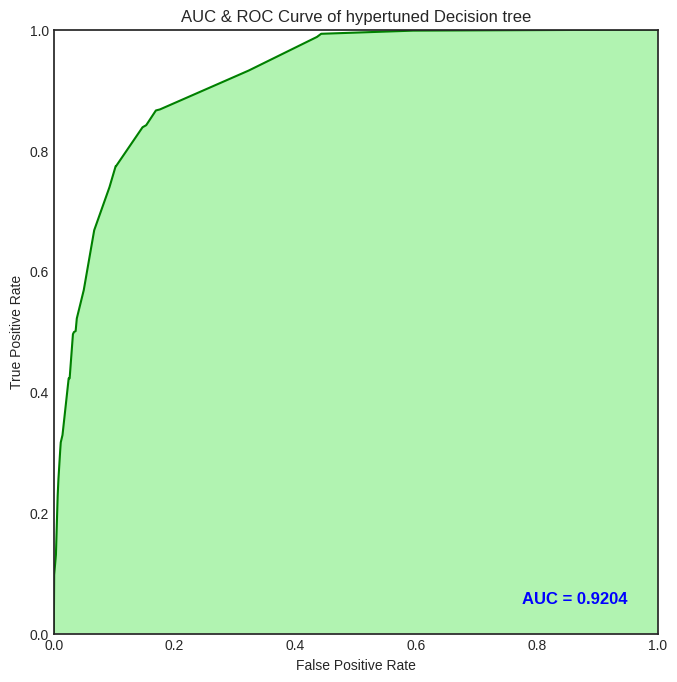

In [ ]:
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, y_pred1)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_pred1)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve of hypertuned Decision tree")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

**RandomForestClassifier**


We use a pipeline to put together the preprocessor from above and RandomForestClassifier

In [ ]:
rf_classifier = Pipeline(
    [
     ('preprocessing', preprocessor),
     ('r_classifier', RandomForestClassifier())
    ]
)

In [ ]:
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)
accuracy_score(y_test, y_pred)

print("Random Forest f-1 score: ",f1_score(y_test,y_pred))
print("Random Forest \n",classification_report(y_test,y_pred))
print("Accuracy Score:",metrics.accuracy_score(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:394: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Random Forest f-1 score:  0.6134715025906736
Random Forest 
               precision    recall  f1-score   support

       False       0.92      0.97      0.94      3124
        True       0.76      0.51      0.61       575

    accuracy                           0.90      3699
   macro avg       0.84      0.74      0.78      3699
weighted avg       0.89      0.90      0.89      3699

Accuracy Score: 0.8991619356582861


In [ ]:
# define search space
parameters = {   'r_classifier__n_estimators': [1000,1100],
   'r_classifier__max_depth' : [5,8,15,20,20],
   'r_classifier__criterion' :['gini', 'entropy']
   }   


# define evaluation
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

# define search
search = GridSearchCV(rf_classifier, parameters, cv=cv)


# execute search
result = search.fit(X_train, y_train.values.ravel())
y_pred = result.predict(X_test)
y_pred2 = result.predict_proba(X_test)[:, 1]


# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)
print("\n Random Forest f-1 score: ",f1_score(y_test,y_pred))
print("Random Forest \n",classification_report(y_test,y_pred))
print("Accuracy Score:",metrics.accuracy_score(y_test, y_pred))


Best Score: 0.9049165962717418
Best Hyperparameters: {'r_classifier__criterion': 'entropy', 'r_classifier__max_depth': 20, 'r_classifier__n_estimators': 1100}

 Random Forest f-1 score:  0.6134969325153374
Random Forest 
               precision    recall  f1-score   support

       False       0.92      0.97      0.94      3124
        True       0.74      0.52      0.61       575

    accuracy                           0.90      3699
   macro avg       0.83      0.74      0.78      3699
weighted avg       0.89      0.90      0.89      3699

Accuracy Score: 0.8978102189781022


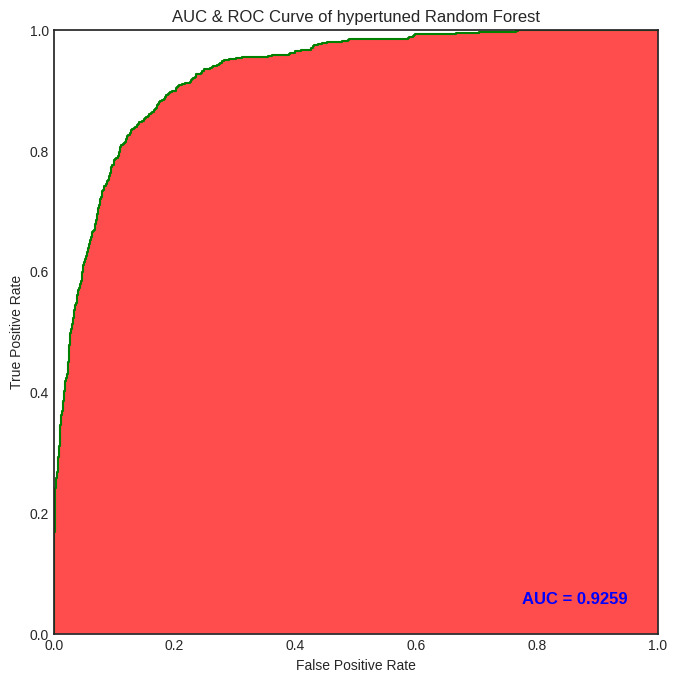

In [ ]:
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, y_pred2)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_pred2)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve of hypertuned Random Forest")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='red', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

**SVC**

We use a pipeline to put together the preprocessor from above and SVC (Support Vector Classifier)

In [ ]:
svc_classifier = Pipeline(
    [
     ('preprocessing', preprocessor),
     ('s_classifier', SVC(probability=True))
    ]
)

In [ ]:
svc_classifier.fit(X_train, y_train)



y_pred = svc_classifier.predict(X_test)
accuracy_score(y_test, y_pred)
print("SVC f-1 score: ",f1_score(y_test,y_pred))
print("\n SVC Initial Classficatinon report before hyperparameter tuning \n",classification_report(y_test,y_pred))
print("Accuracy Score:",metrics.accuracy_score(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVC f-1 score:  0.32378223495702

 SVC Initial Classficatinon report before hyperparameter tuning 
               precision    recall  f1-score   support

       False       0.87      1.00      0.93      3124
        True       0.92      0.20      0.32       575

    accuracy                           0.87      3699
   macro avg       0.89      0.60      0.63      3699
weighted avg       0.88      0.87      0.84      3699

Accuracy Score: 0.8723979453906461


Hyperparameter optimization of SVC (Support Vector Classifier) using GridSearchCV

In [ ]:


# define search space
parameters = {'s_classifier__gamma':[0.1, 5], 's_classifier__C':[5,10,15]}   

# define evaluation
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

# define search
search = GridSearchCV(svc_classifier, parameters, scoring='accuracy', n_jobs=-1, cv=cv)


# execute search
result = search.fit(X_train, y_train)
y_pred = result.predict(X_test)
y_pred3 = result.predict_proba(X_test)[:, 1]

# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)
print("SVC f-1 score: ",f1_score(y_test,y_pred))
print("\n SVC Classfication report after hyperparameter tuning \n",classification_report(y_test,y_pred))
print("Accuracy Score:",metrics.accuracy_score(y_test, y_pred))




/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Best Score: 0.875604037660558
Best Hyperparameters: {'s_classifier__C': 5, 's_classifier__gamma': 0.1}
SVC f-1 score:  0.5076586433260394

 SVC Classfication report after hyperparameter tuning 
               precision    recall  f1-score   support

       False       0.90      0.97      0.93      3124
        True       0.68      0.40      0.51       575

    accuracy                           0.88      3699
   macro avg       0.79      0.68      0.72      3699
weighted avg       0.86      0.88      0.86      3699

Accuracy Score: 0.878345498783455


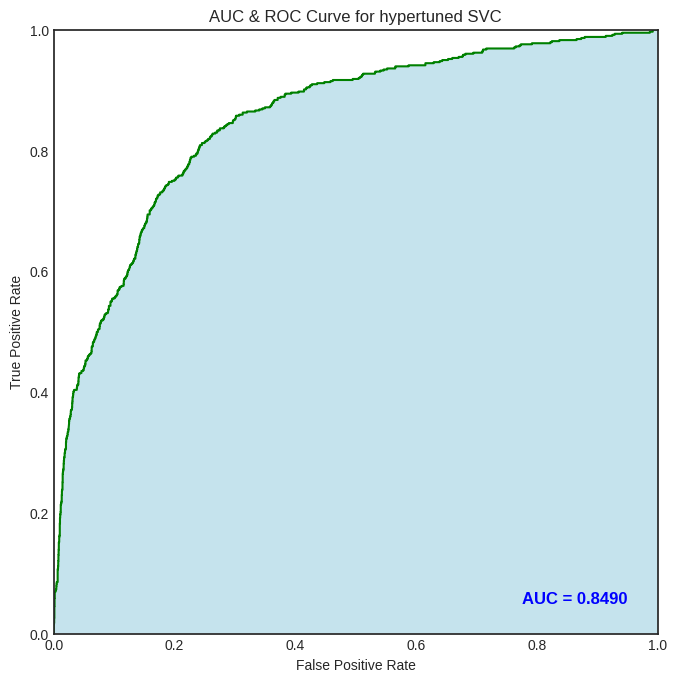

In [ ]:
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, y_pred3)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_pred3)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve for hypertuned SVC")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightblue', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()